In [5]:
!pip install opendatasets
import opendatasets as od

In [6]:
od.download("https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: harsha16112003
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection


100%|██████████| 15.1M/15.1M [00:00<00:00, 189MB/s]

In [9]:
import pickle

In [10]:
import numpy as np
import pandas as pd

In [11]:
import cv2
import os
import random
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

0
1


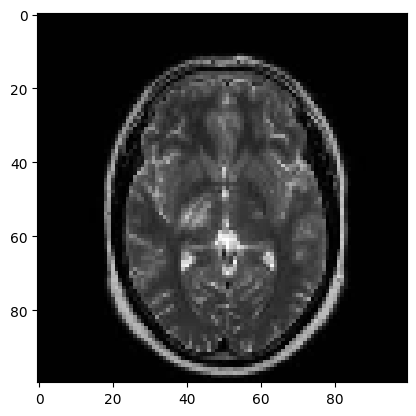

In [58]:
directory ="/content/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset"
categories = ["yes","no"]

image_size = 100
data = []

for category in categories:
  folders = os.path.join(directory,category)
  label = categories.index(category)
  print(label)
  for img in os.listdir(folders):
    img_path = os.path.join(folders,img)
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(image_size,image_size))
    plt.imshow(img_arr)
    #break
    data.append([img_arr,label])

In [20]:
len(data)

253

In [21]:
random.shuffle(data)

In [22]:
data[0]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 1]

In [23]:
x=[]
y=[]

for features,labels in data:
  x.append(features)
  y.append(labels)

In [24]:
x = np.array(x)
y = np.array(y)

In [25]:
x = x/255

In [26]:
x.shape

(253, 100, 100, 3)

In [27]:
import tensorflow as tf

In [28]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [30]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,input_shape=(100,100,3),activation = "relu"))
model.add(Dense(2,activation="softmax"))

In [31]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [33]:
model.fit(x,y,epochs=10,validation_split=0.1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9527 - loss: 0.1945 - val_accuracy: 0.9615 - val_loss: 0.2052
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9583 - loss: 0.1233 - val_accuracy: 0.9231 - val_loss: 0.1859
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9651 - loss: 0.0934 - val_accuracy: 0.9231 - val_loss: 0.1978
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9913 - loss: 0.0488 - val_accuracy: 0.9231 - val_loss: 0.2169
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0263 - val_accuracy: 0.9231 - val_loss: 0.2343
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0242 - val_accuracy: 0.8846 - val_loss: 0.3273
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.9231 - val_loss: 0.2697
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9897 - loss: 0.0201 - val_accuracy: 0.8846 - val_loss: 0.2934


In [56]:
def prdiction_func():
    image_input_path = input("give path to predict the image:")
    input_image = cv2.imread(image_input_path)
    plt.imshow(input_image)
    input_image_resize = cv2.resize(input_image,(100,100))
    input_scaled = input_image_resize/255
    image_reshape = np.reshape(input_scaled,[1,100,100,3])
    input_predict = model.predict(image_reshape)
    input_pred_label = np.argmax(input_predict)

    if input_pred_label == 0:
      print("Iam predicting that NO Brain Tumor")
    else:
      print("Iam predicting that YES having brain tumor")


give path to predict the image:/content/bhave.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Iam predicting that NO Brain Tumor


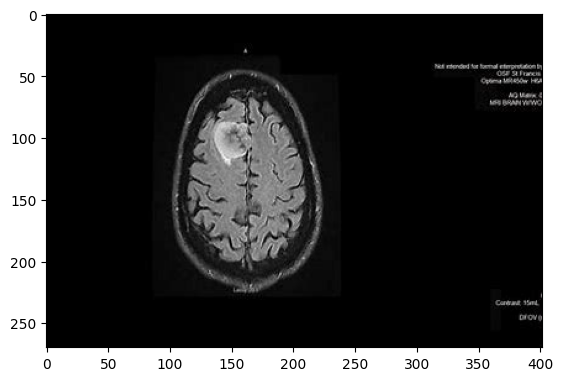

In [59]:
prdiction_func()


give path to predict the image:/content/braintumor.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Iam predicting that YES having brain tumor


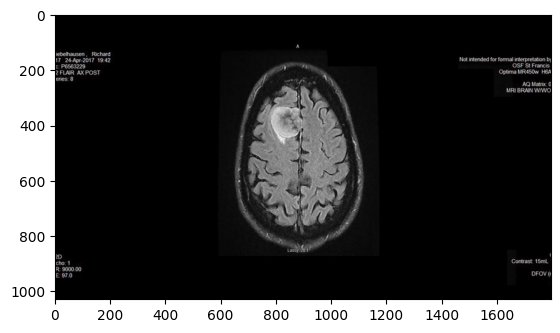

In [60]:
prdiction_func()

give path to predict the image:/content/braintumor3.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Iam predicting that NO Brain Tumor


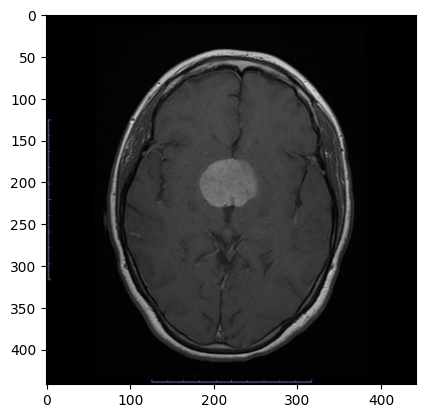

In [61]:
prdiction_func()

give path to predict the image:/content/braintumor4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Iam predicting that YES having brain tumor


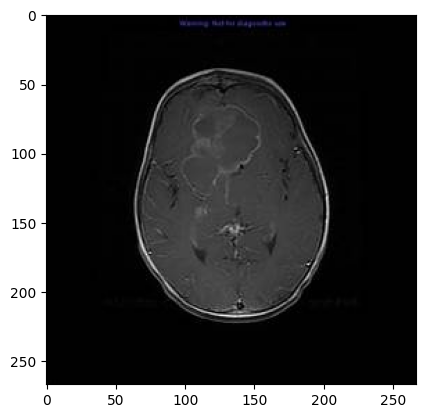

In [62]:
prdiction_func()

give path to predict the image:/content/braintumor2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Iam predicting that NO Brain Tumor


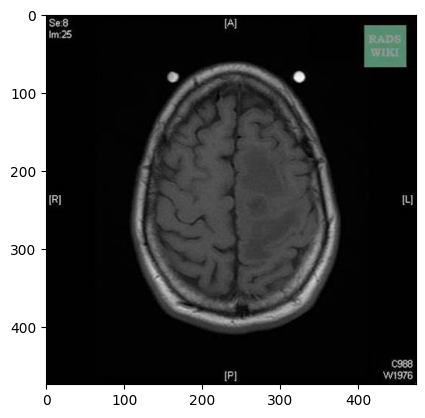

In [64]:
prdiction_func()